# FFT with Python

In [96]:
#load py packages needed
import numpy as np
from matplotlib import pyplot as plt 
from scipy import signal

In [23]:
maxt=100  #even
#maxt=101   #odd
dt=1. #1h
T=(maxt-1)*dt #time period of the whole time series

fq1=2/T
fq2=10/T
fq3=2.25/T

ttt=np.arange(0,maxt,1)*dt
sin1=np.sin(fq1*2*np.pi*ttt)
sin2=np.sin(fq2*2*np.pi*ttt)
sin3=np.sin(fq3*2*np.pi*ttt)
tot=sin1+sin2
tot2=sin1+sin2+sin3

(0, 99.0)

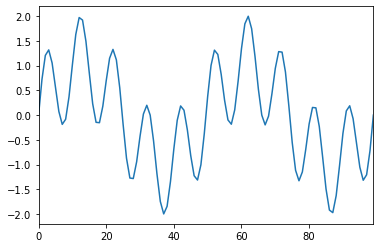

In [95]:
plt.plot(ttt,tot)
#plt.plot(ttt,sin3)
plt.xlim(0,T)

In [64]:
fc=np.fft.fft(tot)                     # Fourier coefficients (FC)
fq=np.fft.fftfreq(ttt.shape[-1],dt)    # Frquencies corresponding to each FC. Units are cycles/h
fc_amp=fc.real*fc.real+fc.imag*fc.imag # Amplitude of FC |a+ib|^2=sqrt(a^2+b^2)^2=a^2+b^2
print(fc[0], fq[0])
print(fc[1],fq[1]*T)
print(fc[2],fq[2]*T)
print(fc[99],fq[99]*T)

(-5.440092820663267e-15+0j) 0.0
(0.023605056364341542-0.7511250726313214j) 0.99
(3.134122119962136-49.81544458188844j) 1.98
(0.02360505636434146+0.7511250726313213j) -0.99


(0, 12)

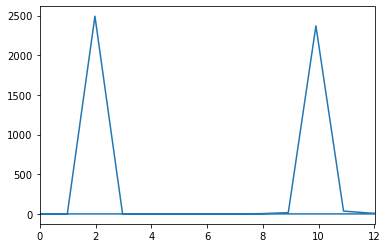

In [65]:
plt.plot(fq*T,fc_amp)
#plt.plot(fc_amp)
plt.xlim(0,12)

In [53]:
fq[0]
#fq[1]*len(tot)
#fq[49]*len(tot)
#fq[50]*len(tot)
#fq[51]*len(tot)

0.0

In [6]:
#fc_shift=np.fft.fftshift(fc_amp)
#fq_shift=np.fft.fftshift(fq)
#plt.plot(fc_amp)
#plt.plot(fc_shift)

In [94]:
# Check Parseval's Theorem that says that energy in time and frequency spaces are equal

sum_t=0
for it in range(len(tot)):
    sum_t=sum_t+tot[it]*tot[it]*dt
    
print('Total energy in time space:', sum_t)

dfreq=fq[1]
sum_freq=0
for ifreq in range(int(len(fc_amp)/2)):
    sum_freq=sum_freq+fc_amp[ifreq]*dfreq
    
#print((len(fc_amp)+1)/2)
#print(fc_amp.shape)
print('Total energy in freq space:',2.*sum_freq)
print('Difference is due to numerical diffusion')

Total energy in time space: 98.99999999999999
Total energy in freq space: 98.99846348902717
Difference is due to numerical diffusion


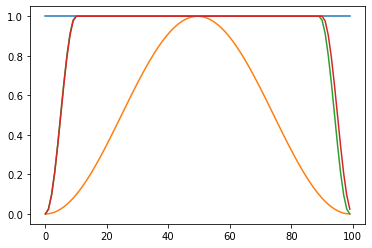

In [100]:
# Tukey window
alpha=0.2
# Tapered cosine windows
win1 = signal.tukey(len(tot),0)     # rectangular window. What we used before.
win2 = signal.tukey(len(tot),1)     # Hann window
win3 = signal.tukey(len(tot),alpha) # Cosine tapered window has 20% of the points of the Tukey window
# Tapered periodic window
win4 = signal.tukey(len(tot),alpha,sym=False)

plt.plot(ttt,win1,ttt,win2,ttt,win3,ttt,win4)
